# Introduction to Star/Galaxy Separation

By Melissa Graham.

Last verified to run Sat Oct 1 2022, with Weekly 2022_40.

## Set Up
import some packages, start TAP service

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
font = {'size'   : 18}
plt.rc('font', **font)

from lsst.rsp import get_tap_service, retrieve_query
service = get_tap_service()

## Get Objects

define the TAP query to get a bunch of true objects

In [2]:
query = "SELECT mt.id_truth_type AS mt_id_truth_type, "\
        "mt.match_objectId AS mt_match_objectId, "\
        "ts.ra AS ts_ra, "\
        "ts.dec AS ts_dec, "\
        "ts.truth_type AS ts_truth_type, "\
        "ts.mag_r AS ts_mag_r, "\
        "ts.is_pointsource AS ts_is_pointsource, "\
        "ts.redshift AS ts_redshift, "\
        "obj.coord_ra AS obj_coord_ra, "\
        "obj.coord_dec AS obj_coord_dec, "\
        "obj.refExtendedness AS obj_refExtendedness, "\
        "obj.refBand as obj_refBand, "\
        "obj.g_extendedness AS obj_g_extendedness, "\
        "obj.r_extendedness AS obj_r_extendedness, "\
        "obj.i_extendedness AS obj_i_extendedness, "\
        "obj.g_extendedness_flag AS obj_g_extendedness_flag, "\
        "obj.r_extendedness_flag AS obj_r_extendedness_flag, "\
        "obj.i_extendedness_flag AS obj_i_extendedness_flag, "\
        "scisql_nanojanskyToAbMag(obj.r_cModelFlux) AS obj_cModelMag_r, "\
        "obj.g_cModelFlux AS obj_g_cModelFlux, "\
        "obj.r_cModelFlux AS obj_r_cModelFlux, "\
        "obj.i_cModelFlux AS obj_i_cModelFlux, "\
        "obj.g_cModelFluxErr AS obj_g_cModelFluxErr, "\
        "obj.r_cModelFluxErr AS obj_r_cModelFluxErr, "\
        "obj.i_cModelFluxErr AS obj_i_cModelFluxErr, "\
        "obj.g_psfFlux AS obj_g_psfFlux, "\
        "obj.r_psfFlux AS obj_r_psfFlux, "\
        "obj.i_psfFlux AS obj_i_psfFlux, "\
        "obj.g_psfFluxErr AS obj_g_psfFluxErr, "\
        "obj.r_psfFluxErr AS obj_r_psfFluxErr, "\
        "obj.i_psfFluxErr AS obj_i_psfFluxErr, "\
        "obj.g_psfFlux_flag AS obj_g_psfFlux_flag, "\
        "obj.r_psfFlux_flag AS obj_r_psfFlux_flag, "\
        "obj.i_psfFlux_flag AS obj_i_psfFlux_flag "\
        "FROM dp02_dc2_catalogs.MatchesTruth AS mt "\
        "JOIN dp02_dc2_catalogs.TruthSummary AS ts ON mt.id_truth_type = ts.id_truth_type "\
        "JOIN dp02_dc2_catalogs.Object AS obj ON mt.match_objectId = obj.objectId "\
        "WHERE CONTAINS(POINT('ICRS', ts.ra, ts.dec), CIRCLE('ICRS', 62.0, -37.0, 0.10)) = 1 "\
        "AND obj.detect_isPrimary = 1"

print(query)

SELECT mt.id_truth_type AS mt_id_truth_type, mt.match_objectId AS mt_match_objectId, ts.ra AS ts_ra, ts.dec AS ts_dec, ts.truth_type AS ts_truth_type, ts.mag_r AS ts_mag_r, ts.is_pointsource AS ts_is_pointsource, ts.redshift AS ts_redshift, obj.coord_ra AS obj_coord_ra, obj.coord_dec AS obj_coord_dec, obj.refExtendedness AS obj_refExtendedness, obj.refBand as obj_refBand, obj.g_extendedness AS obj_g_extendedness, obj.r_extendedness AS obj_r_extendedness, obj.i_extendedness AS obj_i_extendedness, obj.g_extendedness_flag AS obj_g_extendedness_flag, obj.r_extendedness_flag AS obj_r_extendedness_flag, obj.i_extendedness_flag AS obj_i_extendedness_flag, scisql_nanojanskyToAbMag(obj.r_cModelFlux) AS obj_cModelMag_r, obj.g_cModelFlux AS obj_g_cModelFlux, obj.r_cModelFlux AS obj_r_cModelFlux, obj.i_cModelFlux AS obj_i_cModelFlux, obj.g_cModelFluxErr AS obj_g_cModelFluxErr, obj.r_cModelFluxErr AS obj_r_cModelFluxErr, obj.i_cModelFluxErr AS obj_i_cModelFluxErr, obj.g_psfFlux AS obj_g_psfFlux, ob

In [ ]:
# %%time
# results = service.search(query)
# print('Query returned %s matched objects.' % len(results))

In [3]:
job = service.submit_job(query)

print('Job URL is', job.url)

print('Job phase is', job.phase)

Job URL is https://data.lsst.cloud/api/tap/async/ecnxy76ongyspwna
Job phase is PENDING


In [4]:
job.run()

In [5]:
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)

Job phase is COMPLETED


In [6]:
job.raise_if_error()

In [12]:
results = job.fetch_result()#.to_table().to_pandas()

In [13]:
results.fieldnames

('mt_id_truth_type',
 'mt_match_objectId',
 'ts_ra',
 'ts_dec',
 'ts_truth_type',
 'ts_mag_r',
 'ts_is_pointsource',
 'ts_redshift',
 'obj_coord_ra',
 'obj_coord_dec',
 'obj_refExtendedness',
 'obj_refBand',
 'obj_g_extendedness',
 'obj_r_extendedness',
 'obj_i_extendedness',
 'obj_g_extendedness_flag',
 'obj_r_extendedness_flag',
 'obj_i_extendedness_flag',
 'obj_cModelMag_r',
 'obj_g_cModelFlux',
 'obj_r_cModelFlux',
 'obj_i_cModelFlux',
 'obj_g_cModelFluxErr',
 'obj_r_cModelFluxErr',
 'obj_i_cModelFluxErr',
 'obj_g_psfFlux',
 'obj_r_psfFlux',
 'obj_i_psfFlux',
 'obj_g_psfFluxErr',
 'obj_r_psfFluxErr',
 'obj_i_psfFluxErr',
 'obj_g_psfFlux_flag',
 'obj_r_psfFlux_flag',
 'obj_i_psfFlux_flag')

## Explore Extendedness Parameter

how many true stars are extended? how many galaxies are NOT extended?

In [14]:
str_index = np.where(results['ts_truth_type'] == 2)
gal_index = np.where(results['ts_truth_type'] == 1)

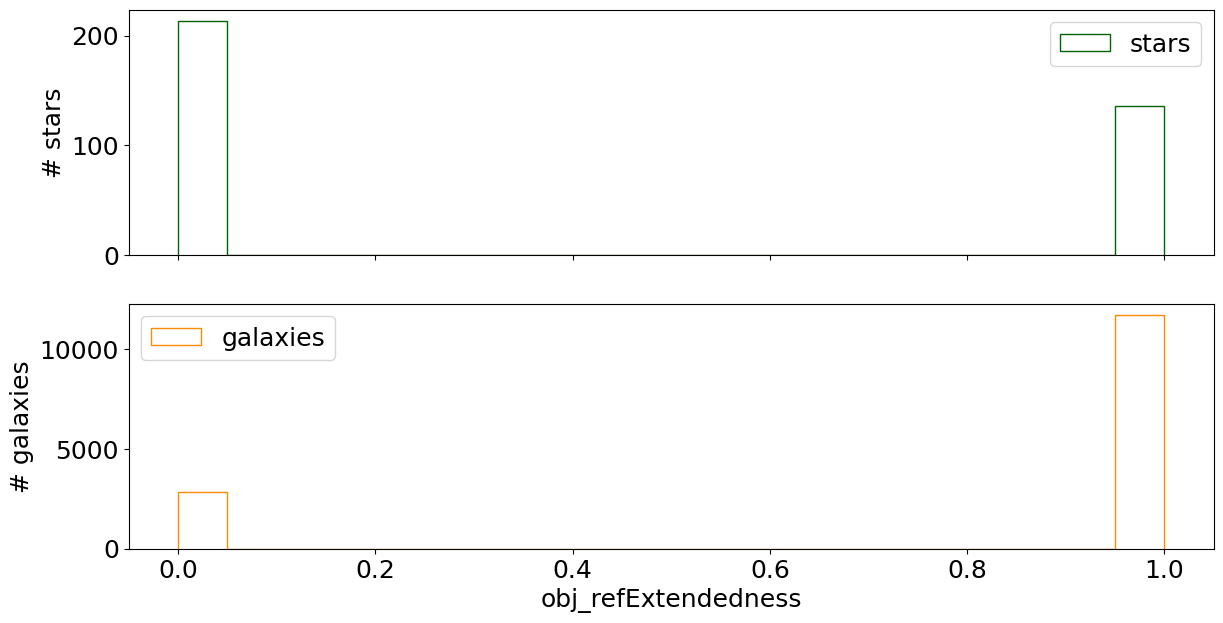

In [15]:
fig, ax = plt.subplots( 2, figsize=(14,7), sharex=True )

ax[0].hist( results['obj_refExtendedness'][str_index], bins=20, histtype='step', \
           color='darkgreen', label='stars' )
ax[0].legend(loc='upper right')

ax[1].hist( results['obj_refExtendedness'][gal_index], bins=20, histtype='step', \
           color='darkorange', label='galaxies' )
ax[1].legend(loc='upper left')

ax[1].set_xlabel('obj_refExtendedness')

ax[0].set_ylabel('# stars')
ax[1].set_ylabel('# galaxies')

plt.show()

what's up with the extended stars and point-like galaxies? are they all faint?

In [ ]:
ext_str_index = np.where( (results['ts_truth_type'] == 2) & (results['obj_refExtendedness'] == 1) )
pnt_str_index = np.where( (results['ts_truth_type'] == 2) & (results['obj_refExtendedness'] == 0) )

ext_gal_index = np.where( (results['ts_truth_type'] == 1) & (results['obj_refExtendedness'] == 1) )
pnt_gal_index = np.where( (results['ts_truth_type'] == 1) & (results['obj_refExtendedness'] == 0) )

In [ ]:
fig, ax = plt.subplots( 2, figsize=(14,7), sharex=True )

ax[0].hist( results['ts_mag_r'][ext_str_index], bins=30, histtype='step', \
           color='limegreen', lw=2, label='extended stars' )
ax[0].hist( results['ts_mag_r'][pnt_str_index], bins=30, histtype='step', \
           color='darkgreen', label='point-like stars' )
ax[0].legend(loc='upper left')

ax[1].hist( results['ts_mag_r'][ext_gal_index], bins=30, histtype='step', \
           color='darkorange', label='extended galaxies' )
ax[1].hist( results['ts_mag_r'][pnt_gal_index], bins=30, histtype='step', \
           color='magenta', lw=2, label='point-like galaxies' )
ax[1].legend(loc='upper left')

ax[1].set_xlabel('true r-band magnitude')

ax[0].set_ylabel('# stars')
ax[1].set_ylabel('# galaxies')
ax[1].set_xlim([15,30])

plt.show()

How is refExtendedness determined?

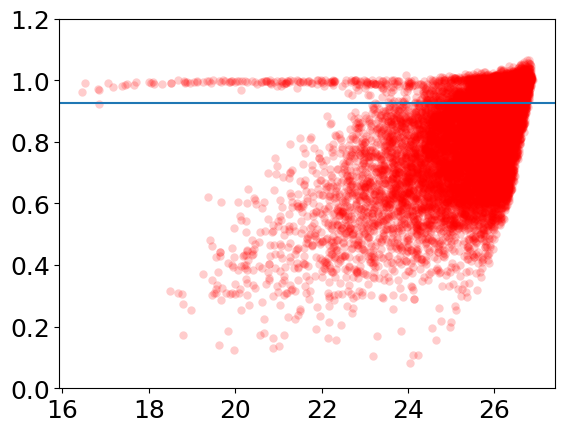

In [16]:
tx = np.where((results['obj_r_extendedness_flag'] == 0) & \
              (results['obj_r_cModelFlux']/results['obj_r_cModelFluxErr'] > 5.0) & \
              (results['obj_r_psfFlux_flag'] == 0) & \
              (results['obj_r_psfFlux']/results['obj_r_psfFluxErr'] > 5.0))[0]

plt.plot(results['obj_cModelMag_r'][tx], \
         results['obj_r_psfFlux'][tx]/results['obj_r_cModelFlux'][tx],\
         'o', alpha=0.2, mew=0, color='red')
plt.ylim([0.0,1.2])
plt.axhline(0.925)

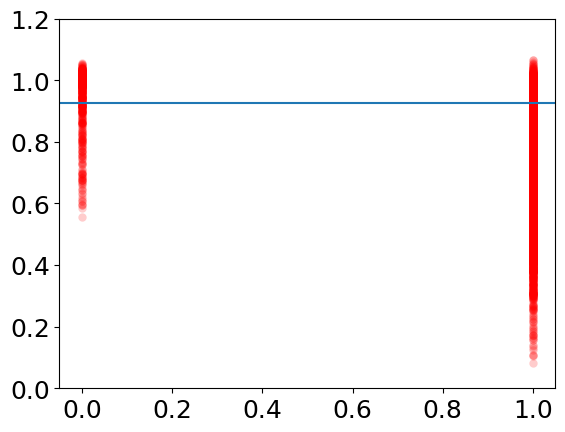

In [17]:
plt.plot(results['obj_r_extendedness'][tx], \
         results['obj_r_psfFlux'][tx]/results['obj_r_cModelFlux'][tx],\
         'o', alpha=0.2, mew=0, color='red')
plt.ylim([0.0,1.2])
plt.axhline(0.925)